In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.drop('customerID',axis='columns',inplace=True)

In [4]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.TotalCharges.values
# df.MonthlyCharges.values
# WE CAME TO KNOW THAT THIS IS STRING

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [6]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [7]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [9]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\Meet\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [11]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [12]:
tunure_churn_no = df1[df1.Churn=='No'].tenure
tunure_churn_yes = df1[df1.Churn=='Yes'].tenure
print(tunure_churn_no)
print(tunure_churn_yes)

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64
2        2
4        2
5        8
8       28
13      49
        ..
7021    12
7026     9
7032     1
7034    67
7041     4
Name: tenure, Length: 1869, dtype: int64


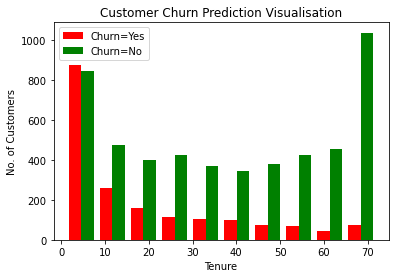

In [13]:
plt.xlabel("Tenure")
plt.ylabel("No. of Customers")
plt.title("Customer Churn Prediction Visualisation")

plt.hist([tunure_churn_yes,tunure_churn_no],color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

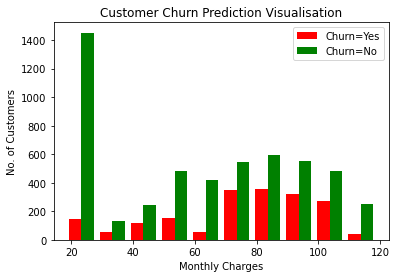

In [14]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges
# print(mc_churn_no)
# print(mc_churn_yes)

plt.xlabel("Monthly Charges")
plt.ylabel("No. of Customers")
plt.title("Customer Churn Prediction Visualisation")

plt.hist([mc_churn_yes,mc_churn_no],color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [15]:
def print_unique_col_values(df):
    for columns in df:
        if(df[columns].dtype=='object'):
            print(columns ,' : ', df[columns].unique())

In [16]:
print_unique_col_values(df1)

gender  :  ['Female' 'Male']
Partner  :  ['Yes' 'No']
Dependents  :  ['No' 'Yes']
PhoneService  :  ['No' 'Yes']
MultipleLines  :  ['No phone service' 'No' 'Yes']
InternetService  :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  ['No' 'Yes' 'No internet service']
OnlineBackup  :  ['Yes' 'No' 'No internet service']
DeviceProtection  :  ['No' 'Yes' 'No internet service']
TechSupport  :  ['No' 'Yes' 'No internet service']
StreamingTV  :  ['No' 'Yes' 'No internet service']
StreamingMovies  :  ['No' 'Yes' 'No internet service']
Contract  :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  ['Yes' 'No']
PaymentMethod  :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  ['No' 'Yes']


In [17]:
df1.replace('No phone service','No',inplace = True)

C:\Users\Meet\anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [18]:
df1.replace('No internet service','No',inplace = True)

In [19]:
print_unique_col_values(df1)

gender  :  ['Female' 'Male']
Partner  :  ['Yes' 'No']
Dependents  :  ['No' 'Yes']
PhoneService  :  ['No' 'Yes']
MultipleLines  :  ['No' 'Yes']
InternetService  :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  ['No' 'Yes']
OnlineBackup  :  ['Yes' 'No']
DeviceProtection  :  ['No' 'Yes']
TechSupport  :  ['No' 'Yes']
StreamingTV  :  ['No' 'Yes']
StreamingMovies  :  ['No' 'Yes']
Contract  :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  ['Yes' 'No']
PaymentMethod  :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  ['No' 'Yes']


In [20]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes': 1, 'No': 0},inplace = True)
#     df1[col].replace('No',0,inplace = True)
#     df1[col].replace('Yes',1,inplace = True)
        
    
print_unique_col_values(df1)

gender  :  ['Female' 'Male']
InternetService  :  ['DSL' 'Fiber optic' 'No']
Contract  :  ['Month-to-month' 'One year' 'Two year']
PaymentMethod  :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


C:\Users\Meet\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [21]:
for columns in df1:
    print(columns ,' : ', df1[columns].unique())

gender  :  ['Female' 'Male']
SeniorCitizen  :  [0 1]
Partner  :  [1 0]
Dependents  :  [0 1]
tenure  :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService  :  [0 1]
MultipleLines  :  [0 1]
InternetService  :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 1]
OnlineBackup  :  [1 0]
DeviceProtection  :  [0 1]
TechSupport  :  [0 1]
StreamingTV  :  [0 1]
StreamingMovies  :  [0 1]
Contract  :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]
PaymentMethod  :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges  :  [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges  :  [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn  :  [0 1]


In [22]:
df1['gender'].replace({'Female': 1, 'Male': 0},inplace = True)

In [23]:
df1['gender'].unique()

array([1, 0], dtype=int64)

In [24]:
df2 = pd.get_dummies(data = df1,columns = ['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [25]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [26]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges'] # so that they come in 0 to 1 range

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [27]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3398,1,0,1,1,0.845070,1,1,1,1,1,...,0,1,0,0,1,0,0,1,0,0
3816,0,1,1,1,0.690141,1,1,1,1,1,...,1,0,0,0,0,1,1,0,0,0
2739,1,0,1,0,0.845070,1,1,0,0,0,...,0,1,0,0,1,0,1,0,0,0
3054,1,0,0,1,0.929577,1,1,0,1,0,...,0,1,0,0,1,0,1,0,0,0
1117,0,0,0,0,0.718310,1,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0


In [28]:
for columns in df2:
    print(columns ,' : ', df2[columns].unique())

gender  :  [1 0]
SeniorCitizen  :  [0 1]
Partner  :  [1 0]
Dependents  :  [0 1]
tenure  :  [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService  :  [0 1]
MultipleLines  :  [0 1]
OnlineSecurity  :  [0 1]
OnlineBackup  :  [1 0]
DeviceProte

In [29]:
df2[df2.tenure==1]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
28,0,0,1,0,1.0,1,1,1,1,1,...,1,0,0,0,0,1,0,1,0,0
35,1,0,1,1,1.0,1,1,1,1,0,...,0,1,0,0,0,1,1,0,0,0
59,1,0,0,0,1.0,1,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
62,0,0,1,0,1.0,0,0,1,1,1,...,1,0,0,0,0,1,1,0,0,0
94,0,0,0,0,1.0,1,1,0,1,1,...,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6982,1,0,1,1,1.0,1,0,1,1,1,...,1,0,0,0,0,1,0,0,1,0
7007,0,1,1,0,1.0,0,0,1,1,1,...,1,0,0,0,0,1,1,0,0,0
7022,0,0,0,0,1.0,1,1,0,1,1,...,0,1,0,0,1,0,0,0,1,0
7037,1,0,0,0,1.0,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [30]:
print (df.iloc[7037].tenure)
print (df.iloc[28].tenure)

72
72


In [31]:
x = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=5)

In [33]:
x_train.shape

(5625, 26)

In [41]:
import tensorflow as tf
from tensorflow import keras
# print(tf.__version__)
# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

model = keras.Sequential([
    keras.layers.Dense(20,input_shape = (26,),activation = 'relu'),
#     keras.layers.Dense(15,activation = 'relu'),
    keras.layers.Dense(1,activation = 'sigmoid'),
])

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5013 - accuracy: 0.7463
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4351 - accuracy: 0.7900
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4229 - accuracy: 0.7970
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4183 - accuracy: 0.8016
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4153 - accuracy: 0.8025
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4139 - accuracy: 0.8066
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4126 - accuracy: 0.8039
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4110 - accuracy: 0.8073
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4099 - accuracy: 0.8069
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4096 - accura

176/176 [==============================] - 0s 1ms/step - loss: 0.3846 - accuracy: 0.8203
Epoch 82/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3842 - accuracy: 0.8215
Epoch 83/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3845 - accuracy: 0.8244
Epoch 84/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3843 - accuracy: 0.8220
Epoch 85/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3839 - accuracy: 0.8226
Epoch 86/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3841 - accuracy: 0.8244
Epoch 87/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3839 - accuracy: 0.8251
Epoch 88/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3837 - accuracy: 0.8251
Epoch 89/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3837 - accuracy: 0.8231
Epoch 90/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3839 - accuracy: 

In [42]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4539 - accuracy: 0.7868


[0.4539114236831665, 0.7867803573608398]

In [43]:
yp = model.predict(x_test)
yp

44/44 [==============================] - 0s 2ms/step


array([[0.16725852],
       [0.35474288],
       [0.01692572],
       ...,
       [0.7218803 ],
       [0.70567656],
       [0.70317703]], dtype=float32)

In [44]:
y_pred = []
for elems in yp:
    if(elems<0.5):
        y_pred.append(0)
    else:
        y_pred.append(1)
        
y_pred

[0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,


In [45]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       999
           1       0.67      0.53      0.59       408

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407



Text(69.0, 0.5, 'Actual')

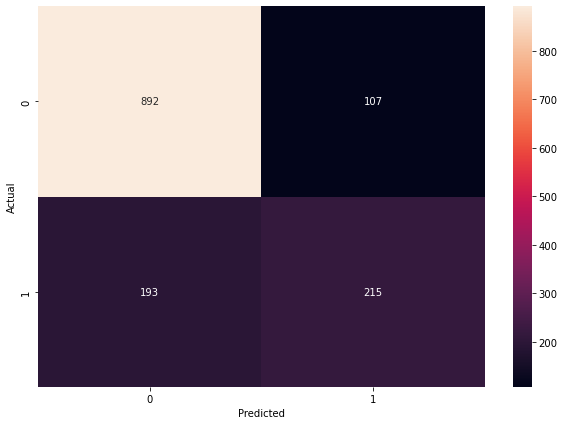

In [46]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')



In [51]:
accuracy = round((892+215)*100/(892+215+193+107),2)
accuracy

78.68